Media a posteriori a lui λ: 17.9208
Modul a posteriori al lui λ: 17.8082
Intervalul HDI de 94% pentru λ: [15.4960, 20.4808]



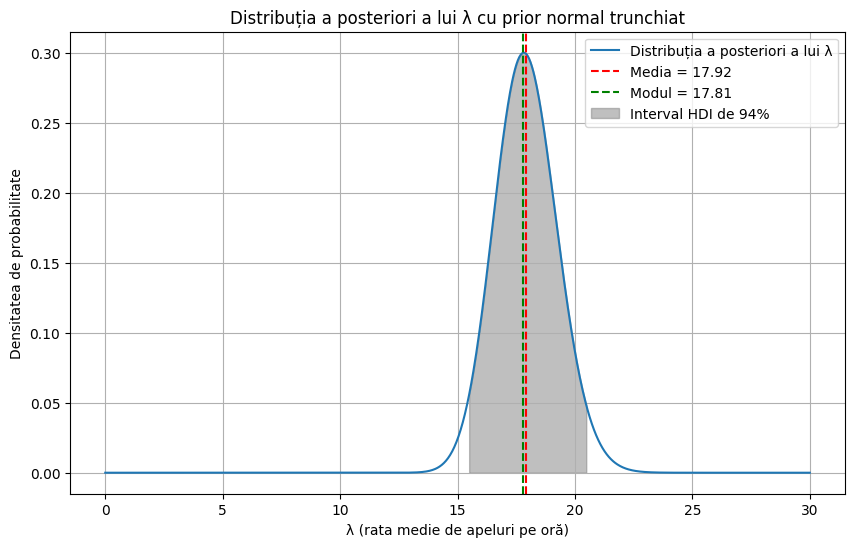

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Datele de intrare
k = 180    # Numărul total de apeluri observate
T = 10     # Intervalul de timp în ore

# am inceput cu lambda = 1, dupa care am ales lambda = media (14)
# lambda_prior = 1

lambda_values = np.linspace(0.001, 30, 1000)

# Funcția densitate a priori (normală trunchiată la zero)
# prior_pdf = stats.poisson.pmf(np.round(lambda_values), mu=lambda_prior)
# prior_pdf /= np.trapz(prior_pdf, lambda_values)

alpha  = 1
beta = 0.1

prior_pdf = stats.gamma.pdf(lambda_values, a=alpha, scale=1/beta)
prior_pdf /= np.trapz(prior_pdf, lambda_values)

# Funcția de verosimilitate Poisson
likelihood = stats.poisson.pmf(k, mu=T * lambda_values)

# Calculăm distribuția a posteriori ne-normalizată
unnormalized_posterior = likelihood * prior_pdf

# Normalizăm distribuția a posteriori
posterior_pdf = unnormalized_posterior / np.trapz(unnormalized_posterior, lambda_values)

# Calculăm media a posteriori a lui λ
mean_lambda = np.trapz(lambda_values * posterior_pdf, lambda_values)

# Calculăm modulul a posteriori al lui λ (valoarea λ unde posteriorul atinge maximul)
mode_index = np.argmax(posterior_pdf)
mode_lambda = lambda_values[mode_index]

cumulative = np.cumsum(posterior_pdf) * (lambda_values[1] - lambda_values[0])
lower_idx = np.where(cumulative >= 0.03)[0][0]
upper_idx = np.where(cumulative <= 0.97)[0][-1]
lower_bound = lambda_values[lower_idx]
upper_bound = lambda_values[upper_idx]

print(f"Media a posteriori a lui λ: {mean_lambda:.4f}")
print(f"Modul a posteriori al lui λ: {mode_lambda:.4f}")
print(f"Intervalul HDI de 94% pentru λ: [{lower_bound:.4f}, {upper_bound:.4f}]\n")

plt.figure(figsize=(10, 6))
plt.plot(lambda_values, posterior_pdf, label='Distribuția a posteriori a lui λ')
plt.axvline(mean_lambda, color='r', linestyle='--', label=f'Media = {mean_lambda:.2f}')
plt.axvline(mode_lambda, color='g', linestyle='--', label=f'Modul = {mode_lambda:.2f}')
plt.fill_between(lambda_values, posterior_pdf, where=(lambda_values >= lower_bound) & (lambda_values <= upper_bound), color='gray', alpha=0.5, label='Interval HDI de 94%')
plt.title('Distribuția a posteriori a lui λ cu prior normal trunchiat')
plt.xlabel('λ (rata medie de apeluri pe oră)')
plt.ylabel('Densitatea de probabilitate')
plt.legend()
plt.grid(True)
plt.show()